# ***Fatores acadêmicos e de empregabilidade que influênciam a colocação no mercado de trabalho***

## Participantes


1.   Mateus Santana dos Reis
2.   Noele Carvalho da Silva



In [3]:
#Abaixo estão todas bibliotecas que serão utilizadas no projeto.
import pickle
import pydotplus
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
!pip install pydotplus
from sklearn.svm import SVC
from google.colab import drive
import matplotlib.pyplot as plt
from IPython.display import Image
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# 1.   Problema de negócio

O objetivo deste projeto é analisar o comportamento dos estudantes do campus XYZ utilizando o conjunto de dados Campus Recruitment. Este conjunto de dados contém informações abrangentes sobre a formação educacional, experiência profissional e expectativas salariais dos estudantes. Através da aplicação do CRISP-DM, iremos identificar os principais fatores que influenciam a colocação profissional dos estudantes no mercado de trabalho. Isso inclui explorar as correlações entre o desempenho acadêmico, experiência prévia de trabalho e as ofertas salariais recebidas, visando compreender as tendências e padrões que impactam a trajetória profissional dos estudantes do campus XYZ.





In [4]:
# Importando a base de dados
#drive.mount('/content/drive')
path = '/content/data.csv'
df= pd.read_csv(path)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
# obtendo o nome das colunas
column_names=df.columns.tolist()

# legendas do kagle
column_legends = ['Serial Number','Gender',
                  'Secondary Education percentage - 10th Grade',
                  'Board of Education - Central/others',
                  'Higher Secondary Education percentage - 12th Grade',
                  'Board of Education- Central/ Others',
                  'Specialization in Higher Secondary Education',
                  'Degree Percentage',
                  'Under Graduation (Degree type) - Field of degree education',
                  'Work Experience',
                  'Employability test percentage (conducted by college)',
                  'Post Graduation (MBA) - Specialization',
                  'MBA percentage',
                  'Status of placement - Placed/Not placed',
                  'Salary offered by corporate to candidates']

legends_db = pd.DataFrame({'Sigla':column_names,'Legenda':column_legends})
print('A tabela abaixo mostra cada coluna da base de dados e sua legenda:\n')
display(legends_db)

A tabela abaixo mostra cada coluna da base de dados e sua legenda:



,Sigla,Legenda
0,sl_no,Serial Number
1,gender,Gender
2,ssc_p,Secondary Education percentage - 10th Grade
3,ssc_b,Board of Education - Central/others
4,hsc_p,Higher Secondary Education percentage - 12th G...
5,hsc_b,Board of Education- Central/ Others
6,hsc_s,Specialization in Higher Secondary Education
7,degree_p,Degree Percentage
8,degree_t,Under Graduation (Degree type) - Field of degr...
9,workex,Work Experience



## 1.1    Situação atual

A base de dados inicial contém 215 registros e 15 atributos, caracterizando-se como relativamente pequena. Os dados abrangem uma variedade de informações, incluindo o histórico educacional dos estudantes, abrangendo desde o ensino secundário até a pós-graduação, bem como detalhes sobre experiência profissional e ofertas salariais. É importante ressaltar que esses dados são específicos da Índia, mas nosso objetivo é adaptá-los e aplicá-los à realidade brasileira. Esta etapa inicial do projeto enquadra-se na fase de Entendimento dos Dados dentro do CRISP-DM, onde buscamos compreender a estrutura e o conteúdo da base de dados, bem como suas possíveis limitações e peculiaridades.



```
# print(f'Verifica-se que a estrutura da base de dados possui {df.shape[0]} linhas e {df.shape[1]} colunas.')
Verifica-se que a estrutura da base de dados possui 215 linhas e 15 colunas.
```




###1.1.1 Recursos a serem utilizados

*   Base de dados: [Campus Recruitment](https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement);
*   Plataforma: Google Colab;
*   Visual Studio Code;
*   Python versão:
```
!python --version
Python 3.10.12
```







###1.1.2 Requisitos, suposições e restrições

* É importante ressaltar que embora não haja valores faltantes na base de dados, a presença de células vazias na coluna de salário é uma observação crucial. Essas células vazias indicam que alguns estudantes não estão trabalhando e, portanto, não possuem um valor de salário associado. Isso afeta diretamente a análise futura, pois precisaremos considerar como tratá-las de maneira apropriada, seja excluindo-as das análises que envolvem salários ou utilizando técnicas de imputação.
* A expectativa de que variáveis como sexo, experiência, formação e especialização influenciem na colocação no mercado de trabalho é válida e bem fundamentada. No entanto, é importante realizar uma análise mais aprofundada para quantificar o impacto de cada uma dessas variáveis, especialmente destacando a expectativa de uma influência maior da formação superior.
* A necessidade de adaptar os insights para a realidade brasileira é fundamental. Isso envolve não apenas considerar diferenças culturais e econômicas entre a Índia e o Brasil, mas também entender as especificidades do mercado de trabalho brasileiro e como elas podem influenciar os resultados da análise.






###1.1.3 Riscos e contigências

* O risco do produto final não ser útil ou aplicável à realidade local é uma consideração válida. Isso pode ocorrer devido a diferenças significativas entre o contexto em que os dados foram coletados (Índia) e o contexto em que serão aplicados (Brasil). Uma maneira de mitigar esse risco é garantir uma análise cuidadosa dos dados e interpretar os resultados com a devida consideração às diferenças culturais, econômicas e estruturais entre os dois países.
* A incerteza em relação à suficiência dos dados e parâmetros para determinar a colocação no mercado de trabalho de um estudante é um desafio comum em projetos de análise de dados. Pode ser difícil capturar todos os aspectos que influenciam o sucesso profissional de um estudante apenas com os dados disponíveis. Para lidar com isso, é importante adotar uma abordagem holística, considerando múltiplos fatores e utilizando técnicas de modelagem e análise robustas.
* A proposta de contornar os problemas usando o estudo como base para a construção de modelos com variáveis locais é uma estratégia prudente. Isso envolveria a adaptação dos modelos e análises desenvolvidos com base nos dados da Índia para refletir melhor a realidade brasileira. Isso pode incluir a incorporação de novas variáveis, ajustes nos parâmetros do modelo e validação adicional para garantir a relevância e precisão dos resultados para o contexto local.

###1.1.4 Terminologias importantes

Abaixo segue uma tabela com todas as terminologias e termos técnicos usado ao longo do projeto.

| Termo                      | Significado                                                                              |
|----------------------------|------------------------------------------------------------------------------------------|
| Aprendizagem Supervisionada| Tipo de aprendizado em que os dados de treinamento incluem rótulos para as saídas desejadas|
| Arvore de Decisão          | Um método de aprendizado de máquina para modelar decisões a partir de dados              |
| Acurácia                   | Proporção de previsões corretas em relação ao total de observações                         |
| Box Plot                   | Gráfico que representa a distribuição de dados por meio de quartis e outliers            |
| Correlação                 | Medida estatística que descreve a relação entre duas variáveis                            |
| Cross Validation           | Técnica para avaliar o desempenho de um modelo em dados não vistos                       |
| Dataset                    | Conjunto de dados utilizado para treinar e testar modelos de machine learning             |
| F1-Score                   | Média harmônica da precisão e recall                                                     |
| Gráfico de Barra           | Gráfico que representa dados categóricos com barras verticais ou horizontais             |
| Gráfico de Distribuição    | Gráfico que mostra a distribuição de dados                                                |
| Gráfico de Dispersão       | Gráfico que representa a relação entre duas variáveis                                      |
| GridSearchCV               | Técnica para encontrar os melhores hiperparâmetros para um modelo                          |
| KNN                        | K-Vizinhos Mais Próximos, um algoritmo de classificação e regressão                        |
| Machine Learning           | Campo da inteligência artificial que permite que os sistemas aprendam com dados          |
| Matriz de Confusão         | Tabela que mostra as frequências de classificação para um modelo                          |
| MAE                        | Erro médio absoluto, uma métrica de avaliação de modelos                                  |
| MSE                        | Erro médio quadrático, uma métrica de avaliação de modelos                                 |
| Macro Avg                  | Média das métricas para cada classe sem levar em consideração o desbalanceamento          |
| Medidas de Tendência Central| Estatísticas que representam o centro de um conjunto de dados (média, mediana, moda)     |
| Métricas                   | Valores usados para avaliar o desempenho de um modelo de machine learning                  |
| Outliers                   | Observações que estão significativamente distantes do restante dos dados                   |
|Overfit                     |Quando um modelo se adapta demais aos dados de treinamento, perdendo capacidade de generalização para novos dados|
| Precisão                   | Proporção de verdadeiros positivos em relação a todos os positivos                         |
| Random Forest              | Algoritmo de aprendizado de máquina baseado em árvores de decisão aleatórias               |
| Regressão Logística        | Método de análise estatística utilizado para prever a probabilidade de uma variável binária|
| Recall                     | Proporção de verdadeiros positivos identificados corretamente                              |
| RMSE                       | Erro médio quadrático da raiz, uma métrica de avaliação de modelos                        |
| SVM                        | Máquinas de Vetores de Suporte, um algoritmo de aprendizado supervisionado                 |
| Variáveis Categóricas      | Variáveis que podem assumir um número limitado e geralmente fixo de valores               |
| Variáveis Numéricas        | Variáveis que representam quantidades numéricas                                            |
| Weighted Avg               | Média ponderada das métricas para cada classe, levando em consideração o desbalanceamento |



###1.1.5 Custos e benefícios

* O potencial do projeto em ajudar jovens a escolher uma carreira com base em sua formação, experiência e outras informações é um benefício significativo. Ao fornecer insights sobre as oportunidades de carreira disponíveis e as habilidades necessárias para ter sucesso nelas, o projeto pode auxiliar os jovens na tomada de decisões informadas sobre seu futuro profissional.
* A possibilidade dos resultados do projeto ajudarem pessoas que já estão empregadas a buscar aperfeiçoamento com base na comparação de seus dados pessoais com estatísticas é outro benefício importante. Isso pode permitir que os profissionais identifiquem lacunas em suas habilidades e áreas de melhoria, contribuindo para o desenvolvimento contínuo de suas carreiras.
* Os custos do projeto, como armazenamento de dados e despesas de infraestrutura web, são fatores a serem considerados. É importante avaliar esses custos em relação aos benefícios potenciais que o projeto pode proporcionar, garantindo que os recursos sejam alocados de forma eficiente para maximizar o retorno sobre o investimento.
* A expectativa de obtenção de receitas pela venda do produto final a estudantes, escolas, universidades, pessoas em busca de emprego e outras instituições interessadas nas informações geradas pela ferramenta é um aspecto crucial. Isso sugere uma fonte potencial de sustentabilidade financeira para o projeto e pode influenciar a viabilidade econômica a longo prazo.

##1.2 Resultados desejados do projeto

* O objetivo de criar uma ferramenta com apelo comercial é crucial para garantir que o projeto seja viável economicamente a longo prazo. Isso envolve não apenas desenvolver uma ferramenta funcional e eficaz, mas também considerar aspectos como usabilidade, design e estratégias de marketing para atrair clientes e gerar receita.
* A intenção de fornecer uma ferramenta que ajude de forma assertiva na orientação de carreira para clientes físicos é um resultado valioso do projeto. Isso implica não apenas na precisão dos insights fornecidos pela ferramenta, mas também na capacidade de comunicar esses insights de forma clara e acessível aos usuários, ajudando-os a tomar decisões informadas sobre suas carreiras.
* O objetivo de fornecer uma ferramenta que ajude de forma assertiva na oferta de produtos para clientes jurídicos é uma extensão interessante do projeto. Isso sugere a possibilidade de utilizar os dados e insights gerados pela ferramenta para desenvolver soluções personalizadas e estratégias de negócios para empresas e organizações que atuam no mercado de trabalho.

###1.2.1 Plano de projeto

Desenvolver um modelo preditivo capaz de prever se um estudante, com base em seu histórico escolar, será contratado ou não por empresas.




##1.3 Que perguntas estamos tentando responder?

* Quais variáveis são essenciais para o estudante ser colocado no mercado de trabalho.





# 2. Compreensão de dados

##2.1 Relatório dos dados

O objetivo desta fase é compreender profundamente os dados disponíveis e sua relevância para o projeto. Os dados abertos, obtidos pelo Github, Campus Recruitment consistem em 215 linhas e 15 colunas, sem valores faltantes, mas com células vazias na coluna de salário, indicando estudantes desempregados.
Os dados incluem informações sobre estudantes do ensino secundário, superior e pós-graduação, experiência profissional e ofertas de salário. Espera-se que variáveis como sexo, experiência, formação e especialização influenciem na colocação no mercado de trabalho, com destaque para a ensino superior.
Além disso, é fundamental adaptar os insights para a realidade brasileira, dada a origem indiana dos dados, considerando diferenças culturais e econômicas. Também é importante prever uma média salarial com base na formação e experiência.
Abaixo são citadosas caracteristicas dos dados:

In [6]:
print(f'Verifica-se que a estrutura da base de dados possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

Verifica-se que a estrutura da base de dados possui 215 linhas e 15 colunas.


In [7]:
print('Verifica-se abaixo os tipos de variáveis armazenados em cada coluna:\n')
df.dtypes

Verifica-se abaixo os tipos de variáveis armazenados em cada coluna:



sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [8]:
print("Abaixo podemos ver a posições de cada coluna do nosso dataframe, a completude dos dados e, novamente o seu tipo:\n")
display(df.info())

Abaixo podemos ver a posições de cada coluna do nosso dataframe, a completude dos dados e, novamente o seu tipo:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(

None

In [9]:
print('Abaixo é possível verificar as primeiras 5 linhas da base de dados: \n')
df.head()

Abaixo é possível verificar as primeiras 5 linhas da base de dados: 



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


##2.2 Descrição dos dados

As informações contidas abrangem diversos aspectos, incluindo histórico educacional, experiência profissional e ofertas de salário. Para a criação de um modelo preditivo, é necessário avaliar a relevância de cada variável. A tabela abaixo apresenta as justificativas para exclusão ou modificação de cada variável selecionada:



\begin{array}{|c|c|} \hline
\hline
\text{Variável} & {Exclusão} & {Modificação} & {Justificativa}              \\ \hline
{sl\_no}   & {X}        & {}            & {Trata-se \space de \space um \space índice.}     \\ \hline
{gender}   & {}         & {X}           & {É \space uma \space variável \space categórica.} \\ \hline
{ssc\_b}   & {}         & {X}           & {É \space uma \space variável \space categórica.} \\ \hline
{hsc\_b }  & {}         & {X}           & {É \space uma \space variável \space categórica.} \\ \hline
{hsc\_s}   & {}         & {X}           & {É \space uma \space variável \space categórica.} \\ \hline
{degree\_t} & {}         & {X}           & {É \space uma \space variável \space categórica.} \\ \hline
{work\_ex}  & {}         & {X}           & {É \space uma \space variável \space categórica.} \\ \hline
{specialisation}& {}         & {X}           & {É \space uma \space variável \space categórica.} \\ \hline
{status}& {}         & {X}           & {É \space uma \space variável \space categórica.} \\ \hline
{salary}& {}         & {X}           & {Alguns \space campos \space estão \space nulos.} \\ \hline             
\end{array}

##2.3 Verificar a qualidade dos dados

Os dados estão completos (abrangem todos os casos necessários)? Não possue falores faltantes, porém saliento, mais uma vez a questão dos dados se ater a realidade indiana, neste sentido, dois componetes da tabela não se aplicam a realidade brasileira que são os ssc_b e hsc_b:
Central significa Conselho Central de Ensino Médio - CBSE; e
Outros Certificado de Ensino Médio Indiano - ICSE
São detalhes históricos da cultura indiana que não possuem aplicabilidade para a realidade brasileira, além de não possuir relevância neste caso.
Estão corretos ou contêm erros e, se houver erros, quão comuns são eles?
Existem valores ausentes nos dados? Se sim, como eles são representados, onde ocorrem e quão comuns são?

####2.3.1 Dados nulos

A única coluna da base de dados que apresentou dados nulos foi a salary. Logo, abaixo segue um script para modificação dos dados nulos para o valor inteiro 0. Também será utilizado a oportunidade para transformar a coluna sl_no em index da base de dados.

In [10]:
# substituindo os campos nam por 0
df['salary']=np.nan_to_num(df['salary'])

#código para transformar a coluna sl_no em como novo índice
#df=df.set_index('sl_no')
display(df)
print('Base de dados sem a presença de dados vazios.')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Base de dados sem a presença de dados vazios.


In [11]:
#verificando se não há números faltantes
print('Abaixo podemos ver que não há campos faltantes:\n')
df.isnull().sum()

Abaixo podemos ver que não há campos faltantes:



sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

#### 2.3.2 Outliers

Ao examinar os dados do conjunto de dados, observamos que a coluna de salary apresenta valores bastante diversos. Decidimos não remover esses valores discrepantes e, posteriormente, optamos por representá-los em um gráfico do tipo boxplot durante a análise exploratória. Isso nos permitirá visualizar a distribuição dos salários de forma mais abrangente e identificar possíveis outliers de maneira mais eficaz.

##2.4 Análise exploratória inicial

####2.4.1 Estatísticas iniciais

Abaixo é possível verificar as princiais tendências centrais das variáveis do dataset.

In [12]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


#### 2.4.2 Dispersão e distribuição das variáveis numéricas

Abaixo podemos verificar a dispersão dos dados e suas respectivas distribuições. Observe que os dados abaixo tratam-se apenas dos dados numéricos.

Distribuição e dispersão dos dados:


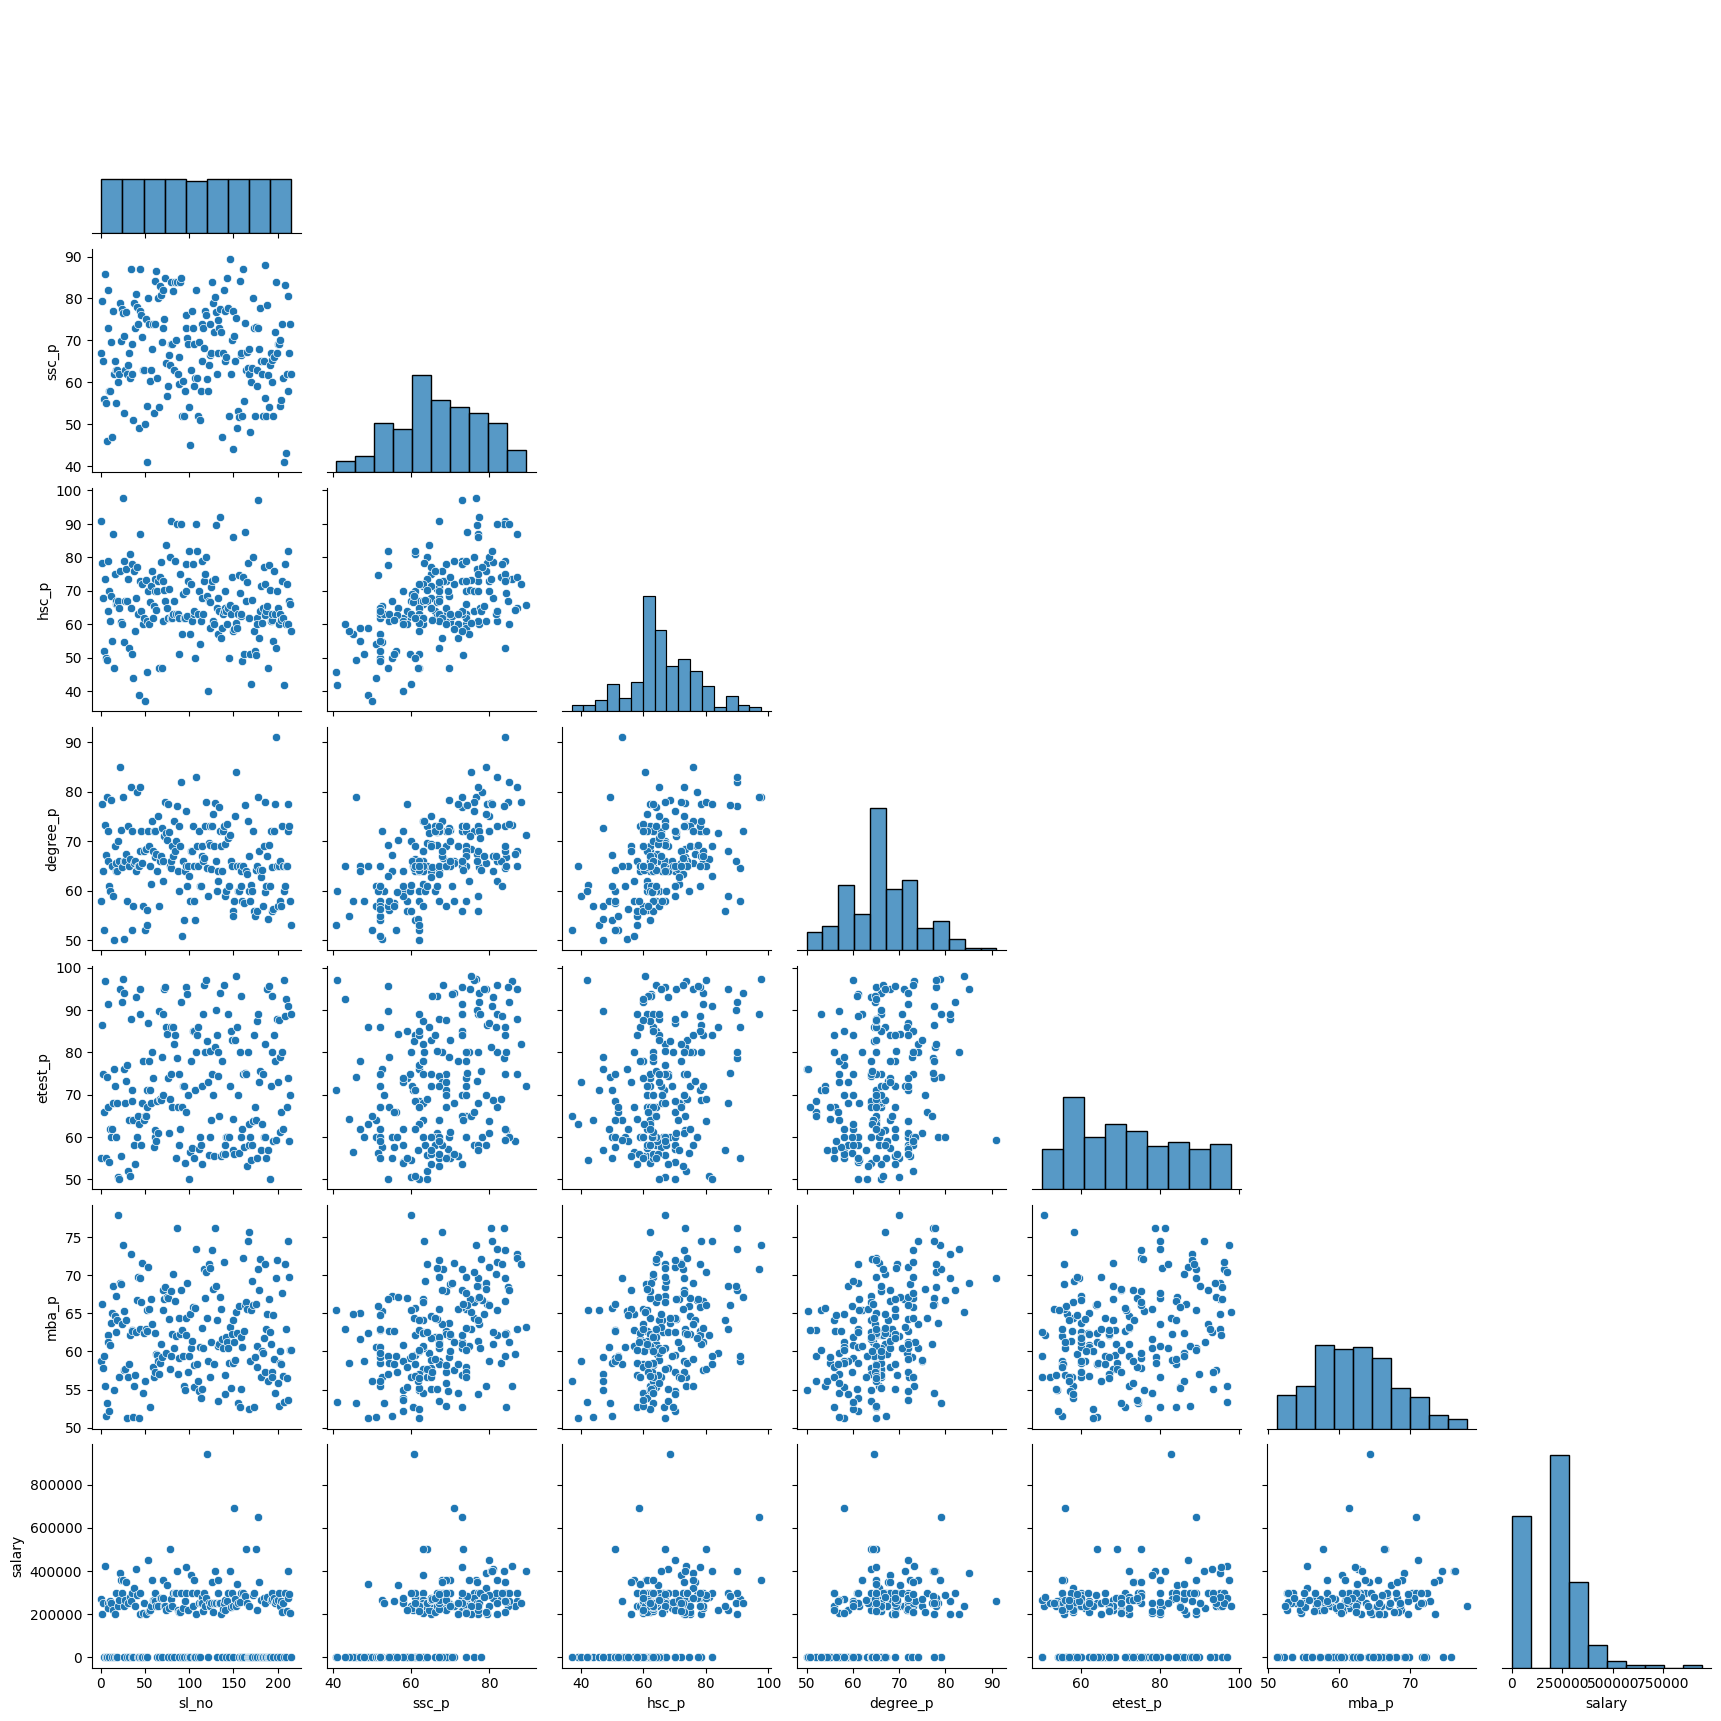

In [13]:
print('Distribuição e dispersão dos dados:')
sns.pairplot(df, diag_kind='hist', corner=True);

Os gráficos acima mostram a dispersão dos dados e seus histogramas. É observável que alguns gráficos apresentem um aspecto de sino em seus histogramas, o que pode evidenciar um comportamento de normalidade dos dados. Contudo, a distribuição dos salários já apresenta um comportamento de acumulação a esquerda, evidenciando que existe uma tendencia maior dos profissionais receberem salários menores.

Distribuição e dispersão dos dados - por colocação:


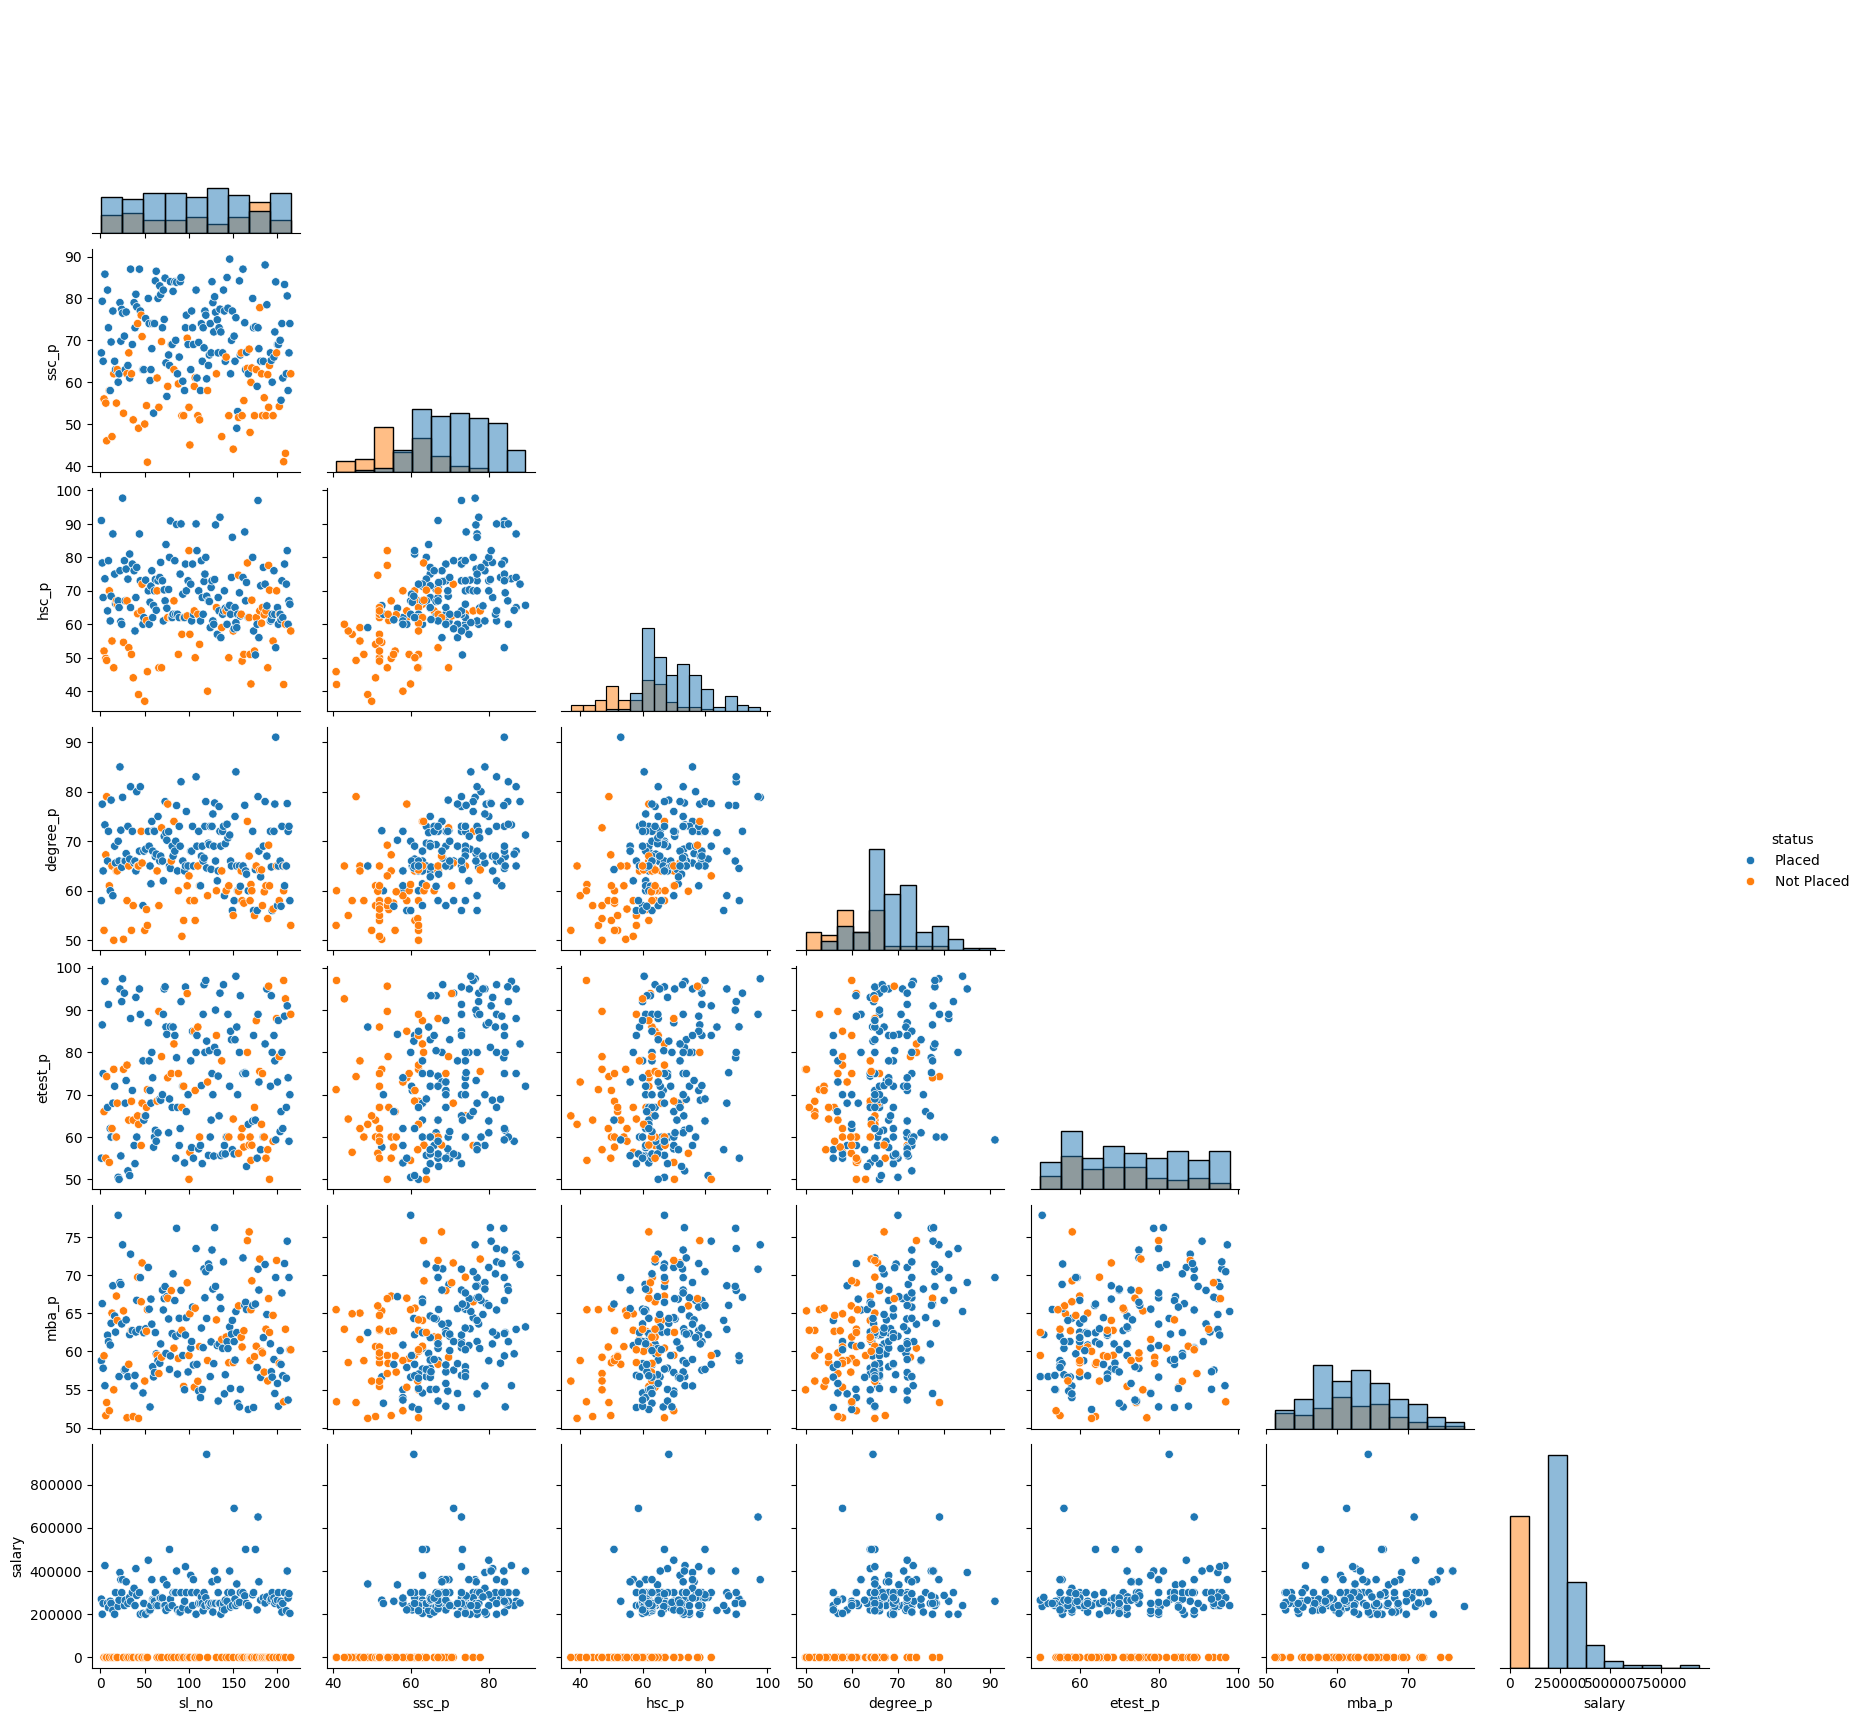

In [14]:
print('Distribuição e dispersão dos dados - por colocação:')
sns.pairplot(df, hue = 'status', diag_kind='hist', corner=True);

Analisando as distribuições e os gráficos de dispersão, já é possível perceber que existem algumas diferenças entre o comportamento dos dados entre aqueles que conseguiram colocação no mercado de trabalho e aqueles que não conseguiram colocação no que tange a distribuição dos dados. Apesar disso, é notavél que os dados matêm os comportamentos já vistos no gráfico de dispersão.

####2.4.3 Box plots

Abaixo podemos ver o box plot dos salários. Talves seja interessante rever os valores definidos iguais a zero.

<ipython-input-15-1ef58bbb60c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_without_zeros, palette='rocket', orient = 'h');


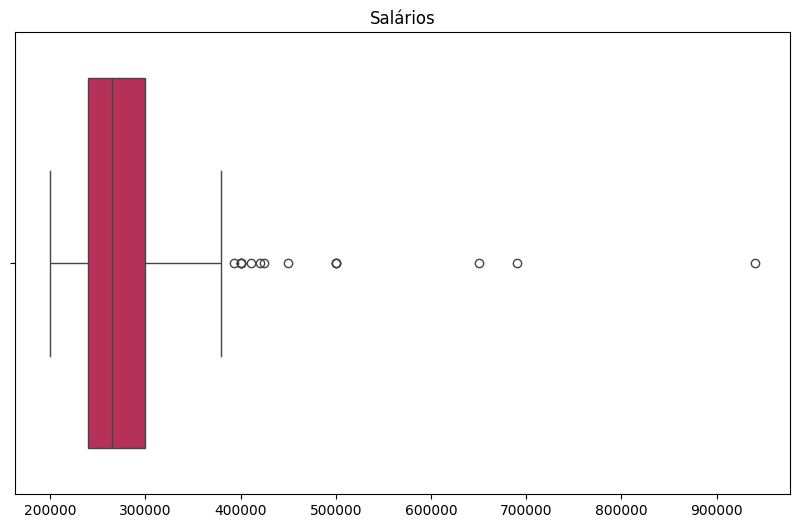

In [15]:
plt.figure(figsize=(10, 6));
data_without_zeros = [x for x in df['salary'] if x != 0]; #retirando os valores zerados
sns.boxplot(data_without_zeros, palette='rocket', orient = 'h');
plt.title('Salários');

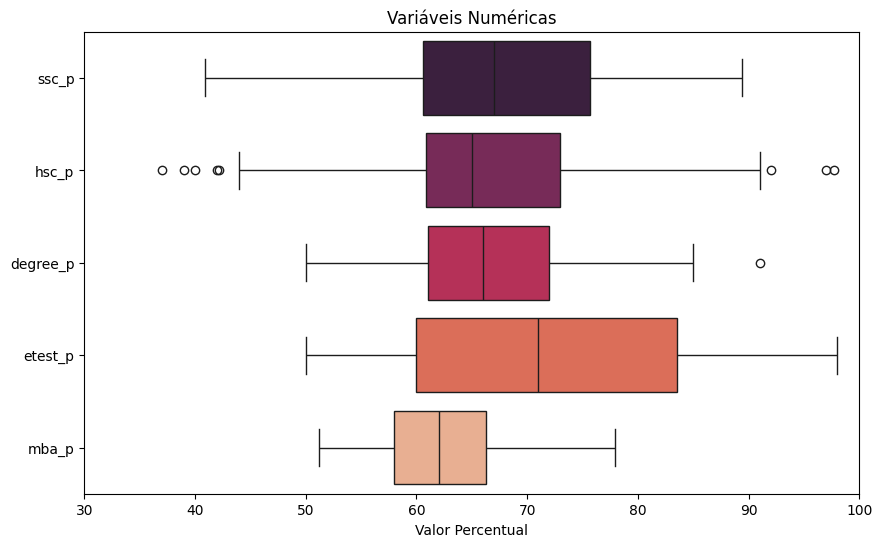

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']], orient = 'h', palette ='rocket' )
plt.xlim(30,100)
plt.xlabel('Valor Percentual')
plt.title("Variáveis Numéricas");

Os gráficos de boxplot nos permitem visualizar os outliers em nosso conjunto de dados e entender como está distribuída a sua variação. Essas informações são valiosas para a análise e preparação do modelo a ser construído.
Observamos que a variável hsc_p é aquela que apresenta o maior número de outliers, seguida pela variável salário. No entanto, optamos por não remover esses outliers neste momento. Essa decisão decorre do tamanho relativamente pequeno do conjunto de dados, e a exclusão dos outliers poderia comprometer a capacidade de classificação do modelo.

####2.4.4 Correlações



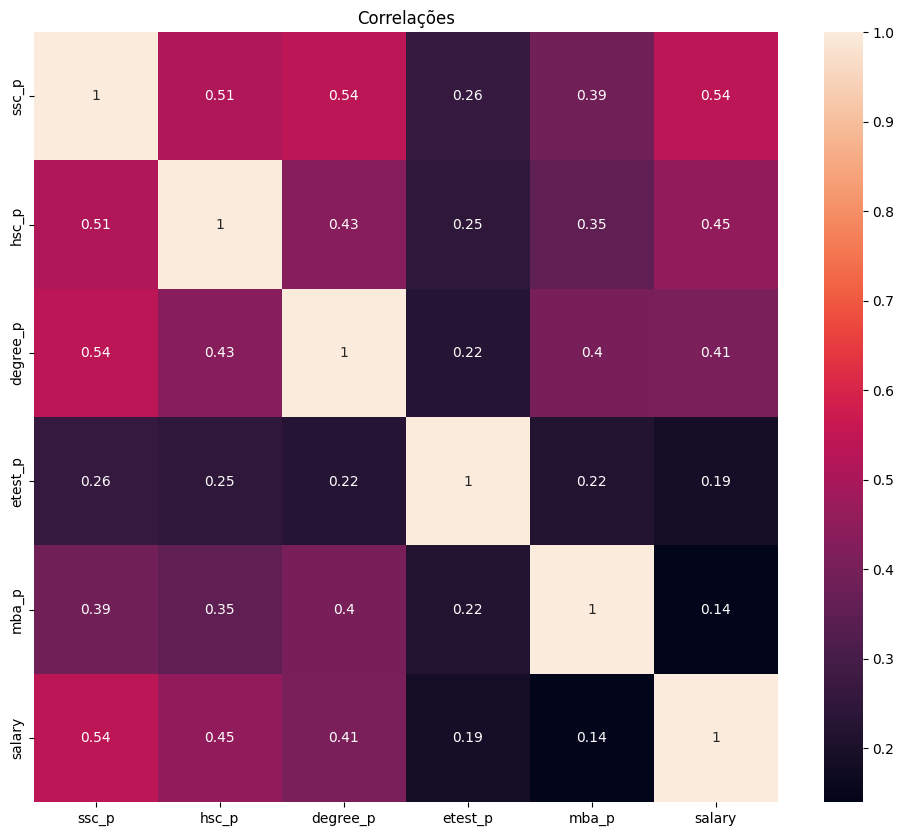

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']].corr(), annot = True)
plt.title('Correlações');

#### 2.4.5 Variáveis categóricas

Abaixo podemos ver os gráficos de coluna das variáveis categóricas. Optou-se por utilizar a visualização por porcentual de cada categória estratificado pela coloção no mercado.

In [18]:
categoricas = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']

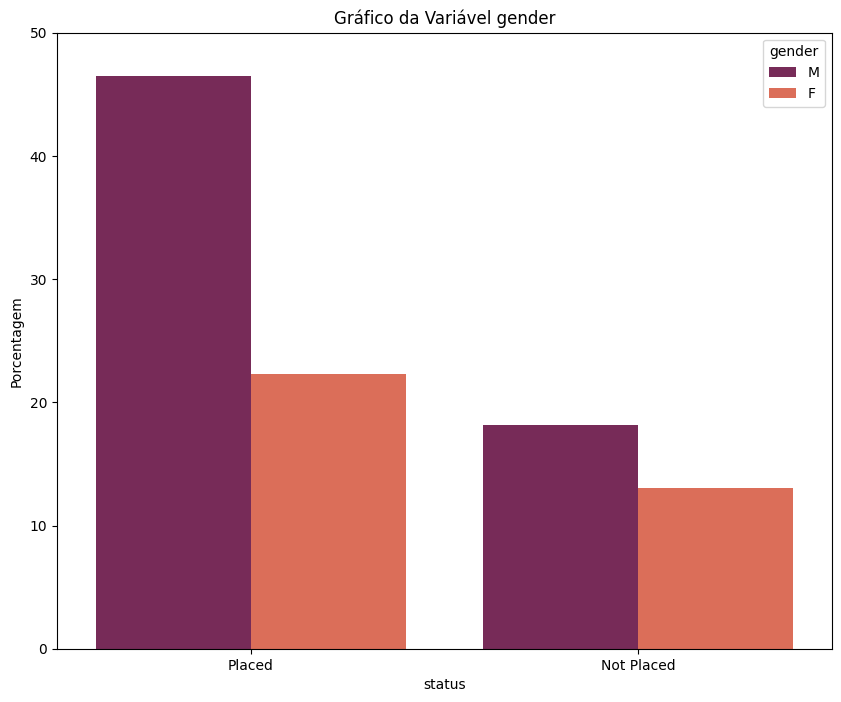

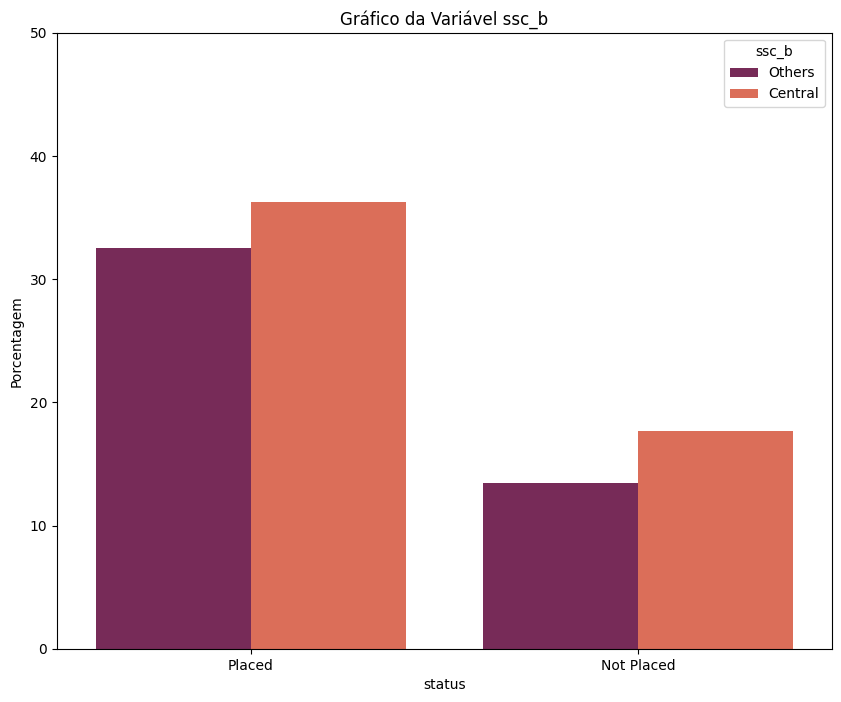

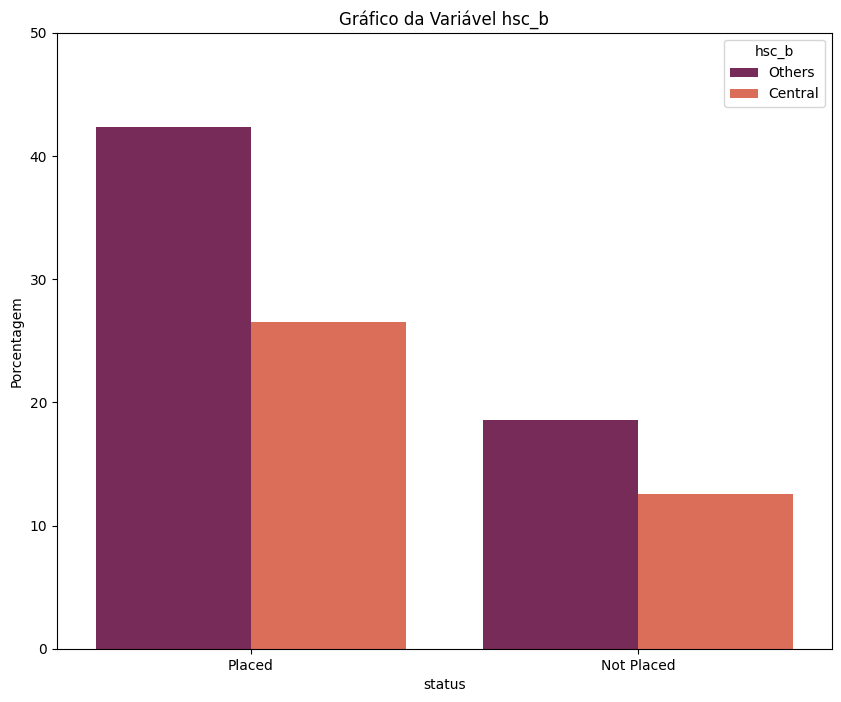

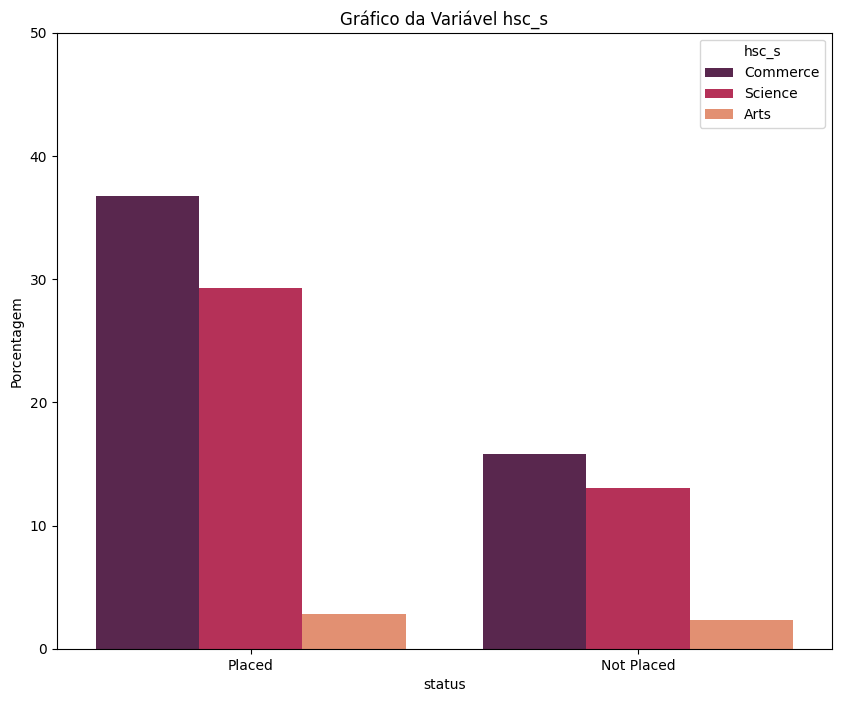

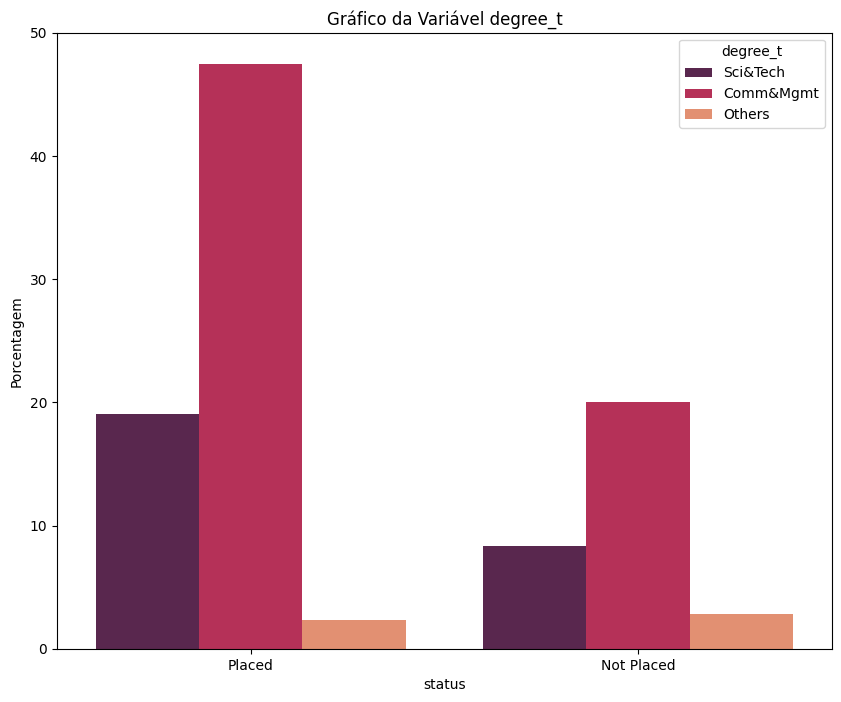

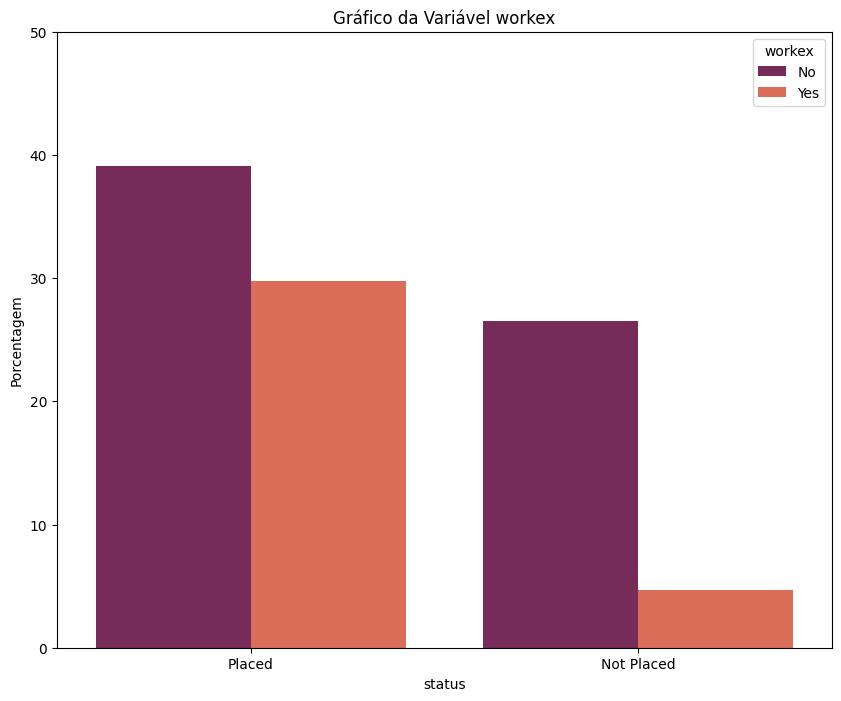

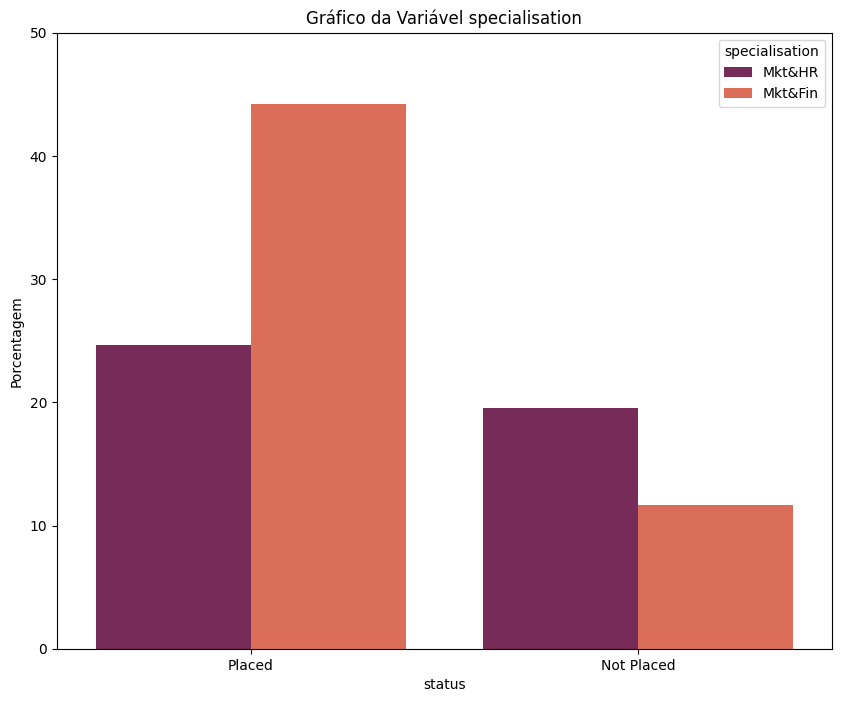

In [19]:
for var in categoricas:
  plt.figure(figsize=(10, 8))
  plt.ylim(0,50)
  ax= sns.countplot(df, hue=var, x = 'status',stat="percent", palette='rocket')
  plt.ylabel('Porcentagem')
  plt.title(f'Gráfico da Variável {var}')
  plt.show()
  print('\n')

### 2.4.6 Relatório da qualidade dos dados

Considerando que o conjunto de dados selecionado para este relatório é relativamente pequeno, com menos de 300 linhas e sem problemas aparentes, acredita-se que a qualidade dos dados é suficiente para construir modelos razoáveis.

No entanto, durante a construção dos modelos, optou-se por não incluir as variáveis que apresentam uma correlação inferior a 0,4 com a maioria das outras variáveis. Além disso, a variável salário não será utilizada devido ao risco de overfitting, já que apenas os profissionais que foram contratados possuem valores diferentes de zero nesse campo.

Quanto às variáveis categóricas, estas serão testadas ao longo do desenvolvimento do modelo. Isso se deve à necessidade de explorar como a presença dessas variáveis influencia a colocação dos profissionais graduados pela instituição, uma vez que não é possível determinar isso apenas com as técnicas utilizadas até o momento.

#3. Criação dos modelos e Preparação dos dados

##3.1 Prepação dos dados

A seguir estão as etapas que consistem principalmente no uso do Label Encoder para o tratamento dos dados categóricos. Essa escolha se deve ao fato de que ainda não conhecemos o comportamento dos modelos com esses dados. No entanto, observou-se que, ao utilizar a estratégia do Label Encoder, os modelos apresentaram um desempenho melhor quando as variáveis ssc_b e hsc_b foram removidas. Esse comportamento pode ser explicado pela semelhança dessas variáveis tanto em suas categorias, que são parecidas, quanto em suas proporções em relação à colocação e não colocação no mercado de trabalho.

#### 3.1.1 Label Encoding

In [20]:
le = LabelEncoder()# utilizado para tranformar valores categóricos em valores inteiro
df2 = df
colunas = ['gender','hsc_s','ssc_b','degree_t','workex','specialisation','status'] #ssc_b e hsc_b foram reiradas

# Aplicar o LabelEncoder a cada coluna
for col in colunas:
    # Converter a coluna em um array bidimensional
    dados_coluna = df2[col].values.reshape(-1, 1)
    # Aplicar o LabelEncoder e atualizar o DataFrame com os valores codificados
    df2[col] = le.fit_transform(dados_coluna)

display(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,Others,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,Others,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,Central,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,Central,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,Central,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,Others,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,Others,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,Others,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,Others,1,58.00,0,0,70.0,1,60.23,1,204000.0


##### 3.1.1.1 Variávei preditoras

Aqui, definimos a variável alvo 'status', juntamente com as demais variáveis preditoras.

In [21]:
col_s = df2.pop('status')# Movendo a coluna que será prevista, coluna status, para o final da tabela
df2['status']=col_s
display(df2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,1,67.00,1,91.00,Others,1,58.00,2,0,55.0,1,58.80,270000.0,1
1,2,1,79.33,0,78.33,Others,2,77.48,2,1,86.5,0,66.28,200000.0,1
2,3,1,65.00,0,68.00,Central,0,64.00,0,0,75.0,0,57.80,250000.0,1
3,4,1,56.00,0,52.00,Central,2,52.00,2,0,66.0,1,59.43,0.0,0
4,5,1,85.80,0,73.60,Central,1,73.30,0,0,96.8,0,55.50,425000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,Others,1,77.60,0,0,91.0,0,74.49,400000.0,1
211,212,1,58.00,1,60.00,Others,2,72.00,2,0,74.0,0,53.62,275000.0,1
212,213,1,67.00,1,67.00,Others,1,73.00,0,1,59.0,0,69.72,295000.0,1
213,214,0,74.00,1,66.00,Others,1,58.00,0,0,70.0,1,60.23,204000.0,1


In [22]:
#Definindo as variáveis independente e alvo
X= df2.drop(['status','hsc_b','ssc_b','salary','etest_p','mba_p'], axis=1)# 'ssc_b' e 'hsc_b'
y=df2['status']

In [23]:
print('Os dados sairão da seguinte forma antes de serem preditos:')
X.head()

Os dados sairão da seguinte forma antes de serem preditos:


,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,specialisation
0,1,1,67.00,91.00,1,58.00,2,0,1
1,2,1,79.33,78.33,2,77.48,2,1,0
2,3,1,65.00,68.00,0,64.00,0,0,0
3,4,1,56.00,52.00,2,52.00,2,0,1
4,5,1,85.80,73.60,1,73.30,0,0,0


In [24]:
#Separando as amostras de treino e teste
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

A seguir, será realizado um procedimento de normalização dos dados para garantir que o modelo não dê mais importância a certos valores em detrimento de outros.

In [25]:
#Feature Scaling
#instanciando e criando o Scaler
scaler= StandardScaler()
#treinando
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
print('Dados normalizados')
X_train[0]

Dados normalizados


array([ 1.44044853, -1.37281295, -0.03310727,  0.35343845, -0.59853581,
       -0.1115059 ,  0.46205492, -0.69652603,  1.08347268])

##### 3.1.1.2 Modelo 1: Árvores de decisão

In [27]:
#importanto a árvore de decisão
def train_model(height):
  model = DecisionTreeClassifier(criterion = 'entropy', max_depth = height, random_state = 0)
  model.fit(X_train, y_train)
  return model

In [28]:
#Avaliando o modelo
for height in range(1, 11): # 1-11
  model = train_model(height)
  y_pred = model.predict(X_test)

  print('--------------------------------------------------------------\n')
  print(f'Altura - {height}\n')
  print("Precisão: " + str(accuracy_score(y_test, y_pred)))

--------------------------------------------------------------

Altura - 1

Precisão: 0.7692307692307693
--------------------------------------------------------------

Altura - 2

Precisão: 0.7692307692307693
--------------------------------------------------------------

Altura - 3

Precisão: 0.7692307692307693
--------------------------------------------------------------

Altura - 4

Precisão: 0.8307692307692308
--------------------------------------------------------------

Altura - 5

Precisão: 0.7692307692307693
--------------------------------------------------------------

Altura - 6

Precisão: 0.7538461538461538
--------------------------------------------------------------

Altura - 7

Precisão: 0.7538461538461538
--------------------------------------------------------------

Altura - 8

Precisão: 0.7384615384615385
--------------------------------------------------------------

Altura - 9

Precisão: 0.7384615384615385
-------------------------------------------------------

Pode-se observar que os melhores modelos são os obtidos com as alturas 4 e 5, apresentando uma queda na precisão para valores menores. Portanto, serão nessas configurações que iremos analisar as demais métricas.

In [29]:
# Puxando o modelo 4 para avaliar
model1 = train_model(4)

In [30]:
pred1 = model1.predict(X_test)

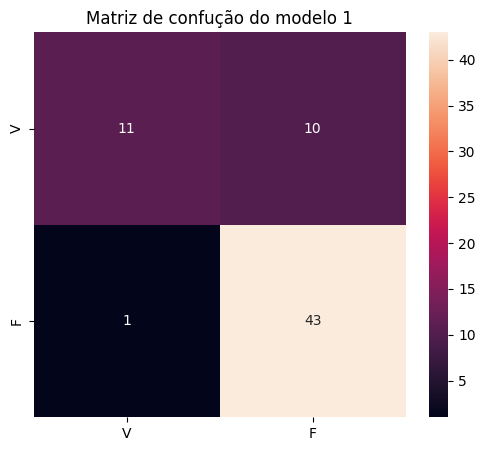

In [31]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred1), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 1');

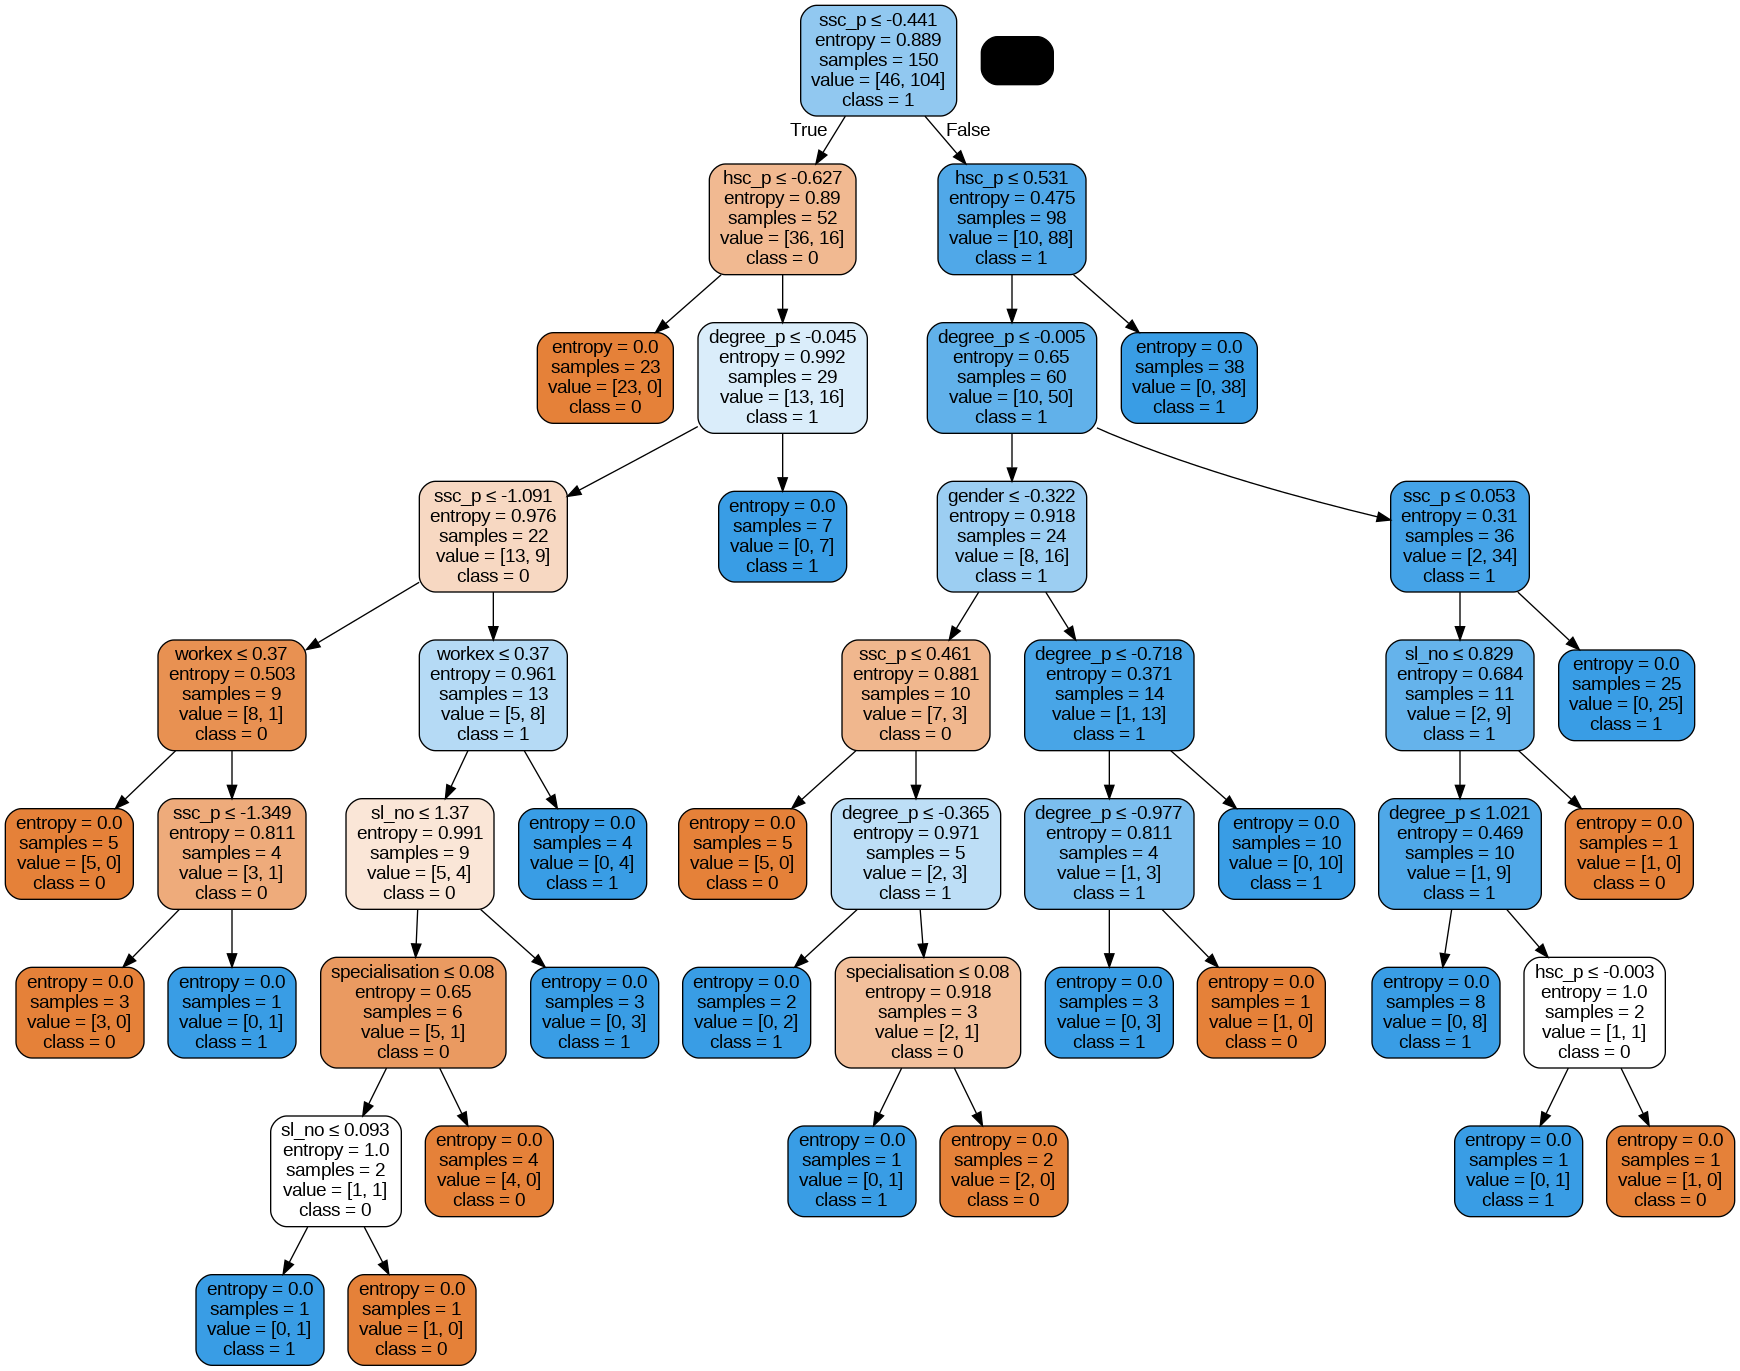

In [32]:
# Exportando a árvore

model1 = train_model(4)


feature_names = X.columns.tolist()

classes_names = ['%.f' % i for i in model.classes_]

dot_data = export_graphviz(model, filled=True, feature_names=feature_names, class_names=classes_names, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())
graph.write_png("tree.png")
Image('tree.png')

##### 3.1.1.3 Modelo 2: Random forest

Nesse modelo, foi empregado o Grid Search para selecionar a floresta com os melhores parâmetros e, consequentemente, encontrar os valores ideais. Foram testadas florestas com um número de árvores variando de 10 a 1000.

In [33]:
param_grid = {'n_estimators':[10,100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)

grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................n_estimators=10;, score=0.967 total time=   0.1s
[CV 2/5] END ...................n_estimators=10;, score=0.667 total time=   0.1s
[CV 3/5] END ...................n_estimators=10;, score=0.867 total time=   0.1s
[CV 4/5] END ...................n_estimators=10;, score=0.900 total time=   0.0s
[CV 5/5] END ...................n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/5] END ..................n_estimators=100;, score=0.900 total time=   0.3s
[CV 2/5] END ..................n_estimators=100;, score=0.767 total time=   0.4s
[CV 3/5] END ..................n_estimators=100;, score=0.933 total time=   0.4s
[CV 4/5] END ..................n_estimators=100;, score=0.800 total time=   0.3s
[CV 5/5] END ..................n_estimators=100;, score=0.867 total time=   0.4s
[CV 1/5] END ..................n_estimators=200;, score=0.867 total time=   2.2s
[CV 2/5] END ..................n_estimators=200;

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700,
                                          800, 1000]},
             verbose=3)

Valores ideiais para o tamanho da floresta.

In [34]:
print(grid_cv.best_params_)

{'n_estimators': 600}


In [35]:
pred2 = grid_cv.predict(X_test)

Relatório de classificação:

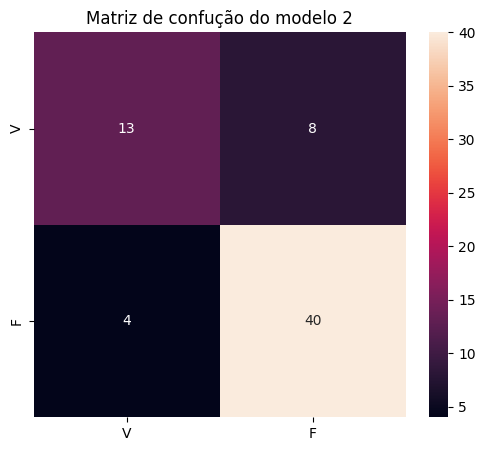

In [36]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred2), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 2');

#####3.1.1.4 Modelo 3: Regressão logística

In [37]:
model3 = LogisticRegression(n_jobs = -1) #criando o modelo
model3.fit(X_train,y_train)# treinando

LogisticRegression(n_jobs=-1)

In [38]:
%%time
pred3 = model3.predict(X_test)

CPU times: user 0 ns, sys: 742 µs, total: 742 µs
Wall time: 762 µs


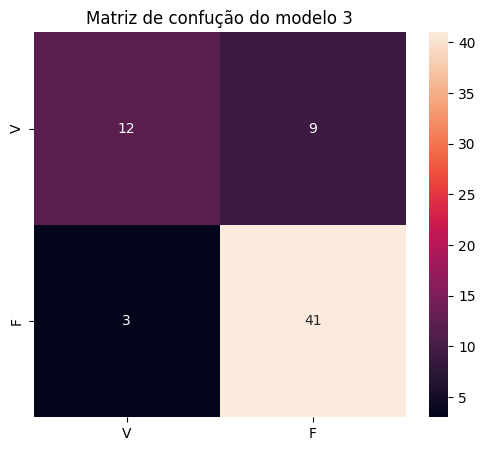

In [39]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred3), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 3');

##### 3.1.1.5 Modelo 4: KMN

In [40]:
model4 = KNeighborsClassifier(n_neighbors=1) # criando o modelo

In [41]:
model4.fit(X_train,y_train)# treinando o modelo

KNeighborsClassifier(n_neighbors=1)

In [42]:
%%time
pred4 = model4.predict(X_test)#fazendo as predições

CPU times: user 8.11 ms, sys: 4 µs, total: 8.11 ms
Wall time: 8.28 ms


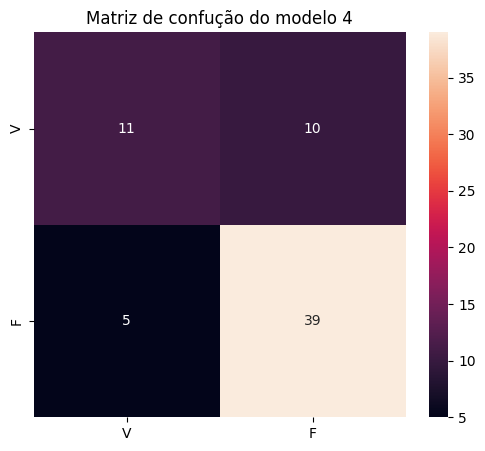

In [43]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred4), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 4');

##### 3.1.1.6 Modelo 5: SVM

In [44]:
model5 = SVC() # criando o modelo

In [45]:
model5.fit(X_train, y_train) # treinando o modelo

SVC()

In [46]:
%%time
pred5 = model5.predict(X_test)

CPU times: user 2.16 ms, sys: 0 ns, total: 2.16 ms
Wall time: 1.58 ms


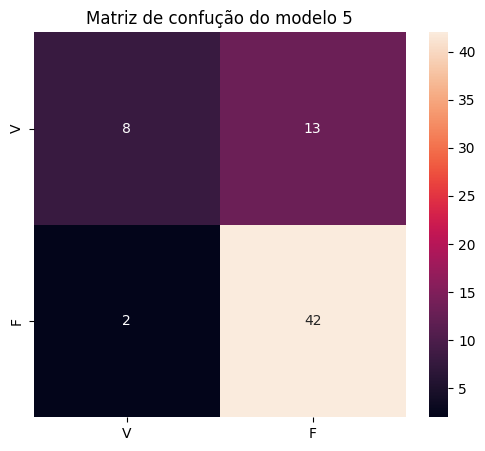

In [47]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred5), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 5');

##### 3.1.1.7 Modelo 6: XGboost

In [48]:
# Trainando o XGBoost
model6 = XGBClassifier(max_depth=4, learning_rate= 0.05, n_estimators=200, objective = 'binary:logistic', randon_state=42)
model6.fit(X_train, y_train)

pred6 = model6.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:41:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)


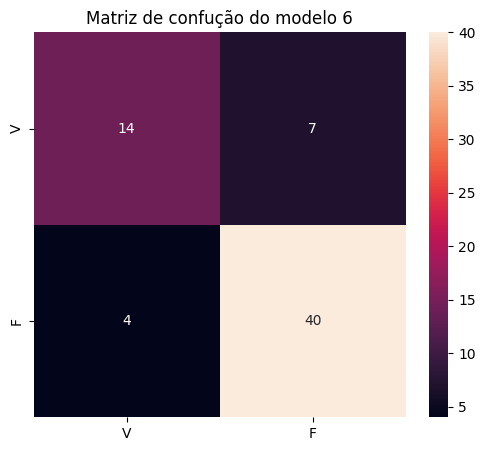

In [49]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred6), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 6');

#### 3.1.2 One-Hot Encoding

Até o momento, os modelos desenvolvidos utilizaram exclusivamente o Label Encoding. No entanto, em testes prévios, foi observado que nem todas as variáveis apresentaram melhora de desempenho utilizando apenas essa técnica de codificação. Por essa razão, o One-hot Encoder foi empregado para as variáveis categóricas com mais de dois níveis.

Além disso, foi necessário recarregar os dados em um novo DataFrame do pandas. Isso se deve a algum problema na plataforma que alterou o DataFrame original, tornando sua manipulação para os próximos modelos difícil. Portanto, a criação de um novo conjunto de dados foi a solução mais adequada para contornar as limitações e falhas da plataforma.

É importante ressaltar que, nesta fase do projeto, a explicação detalhada linha por linha dos modelos anteriores não será repetida, uma vez que os mesmos modelos foram utilizados. A principal diferença está no tratamento dos dados.

In [50]:
df3 = pd.read_csv(path)
# substituindo os campos nam por 0
df3['salary']=np.nan_to_num(df3['salary'])

#código para transformar a coluna sl_no em como novo indice
df3=df3.set_index('sl_no')


display(df3)
print('Base de dados sem a presença de dados vazios.')

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


Base de dados sem a presença de dados vazios.


In [51]:
#tratamento com o One-Hot encoder das variáveis binárias
colunas = ['hsc_s','degree_t','specialisation'] #'gender', 'workex' - variáveis binárias
for col in colunas:
    dados_coluna = df3[col].values.reshape(-1, 1) # Converter a coluna em um array bidimensional
    le = OneHotEncoder(sparse=False)  # Aplicar o OneHotEncoder e adicionar as novas colunas ao DataFrame
    novas_colunas = le.fit_transform(dados_coluna)
    for i in range(novas_colunas.shape[1]):
        nome_coluna = f"{col}_{i}"
        df3[nome_coluna] = novas_colunas[:, i]
df3.drop(columns=colunas, inplace=True) # Remover as colunas originais
display(df3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,mba_p,status,salary,hsc_s_0,hsc_s_1,hsc_s_2,degree_t_0,degree_t_1,degree_t_2,specialisation_0,specialisation_1
sl_no,,,,,,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,58.00,No,55.0,58.80,Placed,270000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,M,79.33,Central,78.33,Others,77.48,Yes,86.5,66.28,Placed,200000.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,M,65.00,Central,68.00,Central,64.00,No,75.0,57.80,Placed,250000.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,M,56.00,Central,52.00,Central,52.00,No,66.0,59.43,Not Placed,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,M,85.80,Central,73.60,Central,73.30,No,96.8,55.50,Placed,425000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,77.60,No,91.0,74.49,Placed,400000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
212,M,58.00,Others,60.00,Others,72.00,No,74.0,53.62,Placed,275000.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
213,M,67.00,Others,67.00,Others,73.00,Yes,59.0,69.72,Placed,295000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [52]:
#tratamento com o Label Encoder

le = LabelEncoder()
colunas = ['status','gender', 'workex']

# Aplicar o LabelEncoder a cada coluna
for col in colunas:
    # Converter a coluna em um array bidimensional
    dados_coluna = df3[col].values.reshape(-1, 1)
    # Aplicar o LabelEncoder e atualizar o DataFrame com os valores codificados
    df3[col] = le.fit_transform(dados_coluna)

display(df3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,mba_p,status,salary,hsc_s_0,hsc_s_1,hsc_s_2,degree_t_0,degree_t_1,degree_t_2,specialisation_0,specialisation_1
sl_no,,,,,,,,,,,,,,,,,,,
1,1,67.00,Others,91.00,Others,58.00,0,55.0,58.80,1,270000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,79.33,Central,78.33,Others,77.48,1,86.5,66.28,1,200000.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,65.00,Central,68.00,Central,64.00,0,75.0,57.80,1,250000.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,56.00,Central,52.00,Central,52.00,0,66.0,59.43,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,85.80,Central,73.60,Central,73.30,0,96.8,55.50,1,425000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,Others,82.00,Others,77.60,0,91.0,74.49,1,400000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
212,1,58.00,Others,60.00,Others,72.00,0,74.0,53.62,1,275000.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
213,1,67.00,Others,67.00,Others,73.00,1,59.0,69.72,1,295000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [53]:
# separando variáveis preditoras e variável alvo
X= df3.drop(['status','ssc_b','hsc_b', 'salary','etest_p','mba_p'], axis=1) # decidimos testar retirando também as variáveis  'ssc_b' e 'hsc_b'
y=df3['status']

Abaixo é possível verificar como o modelo está após o tratamento com o One-Hot Encoding.

In [54]:
X.head()

,gender,ssc_p,hsc_p,degree_p,workex,hsc_s_0,hsc_s_1,hsc_s_2,degree_t_0,degree_t_1,degree_t_2,specialisation_0,specialisation_1
sl_no,,,,,,,,,,,,,
1,1,67.00,91.00,58.00,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,79.33,78.33,77.48,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,65.00,68.00,64.00,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,56.00,52.00,52.00,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,85.80,73.60,73.30,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [55]:
#Fazendo a validação cruzada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
# normalizando os dados atraves do  standardscaler
scaler= StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### 3.1.2.1 Modelo 1: Regressão logística

In [57]:
model7 = LogisticRegression(n_jobs = -1) #criando o modelo
model7.fit(X_train,y_train) #freitando o modelo

LogisticRegression(n_jobs=-1)

Previssões e avaliações - Regressão Logística

In [58]:
%%time
pred7 = model7.predict(X_test)

CPU times: user 589 µs, sys: 0 ns, total: 589 µs
Wall time: 617 µs


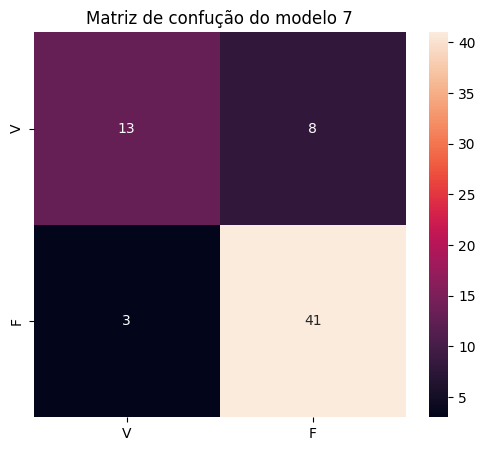

In [59]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred7), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 7');

##### 3.1.2.2 Modelo 2: KMN

In [60]:
model8 = KNeighborsClassifier(n_neighbors=1)

In [61]:
model8.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Previssões e avaliações - KMN

In [62]:
%%time
pred8 = model8.predict(X_test)

CPU times: user 8.85 ms, sys: 0 ns, total: 8.85 ms
Wall time: 14.4 ms


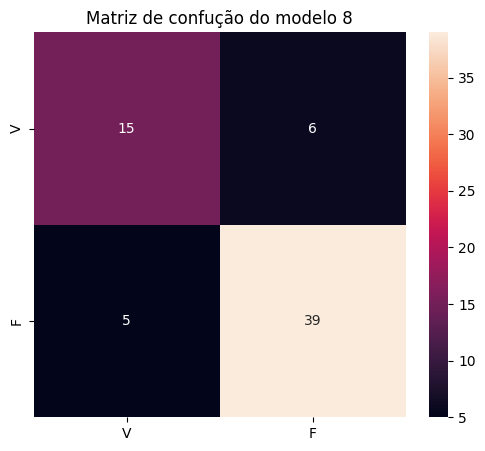

In [63]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred8), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 8');

##### 3.1.2.3 Modelo 3: SVM

In [64]:
model9 = SVC() # criando o modelo
model9.fit(X_train, y_train)# treinando o modelo

SVC()

Previssões e avaliações - SVM

In [65]:
%%time
pred9 = model9.predict(X_test) #prevendo

CPU times: user 1.1 ms, sys: 964 µs, total: 2.07 ms
Wall time: 1.46 ms


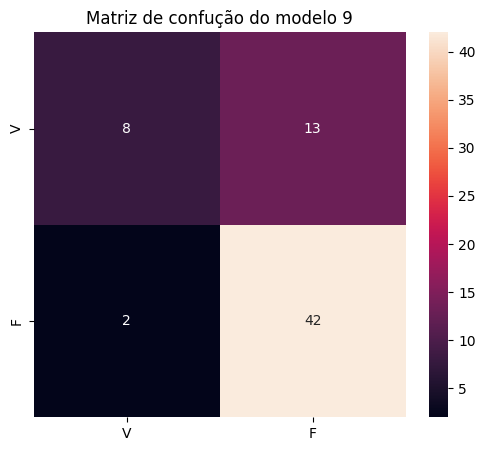

In [66]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred9), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 9');

##### 3.1.2.4 Modelo 4: Árvore de decisão

In [67]:
def train_model(height): # criando a função para verificar em qua altura a arvore apresenta a melhor precisão
  model = DecisionTreeClassifier(criterion = 'entropy', max_depth = height, random_state = 0)
  model.fit(X_train, y_train)
  return model

In [68]:
for height in range(1, 11): # 1-11 #fazendo o teste
  model = train_model(height)
  y_pred = model.predict(X_test)

  print('--------------------------------------------------------------\n')
  print(f'Altura - {height}\n')
  print("Precisão: " + str(accuracy_score(y_test, y_pred)))

--------------------------------------------------------------

Altura - 1

Precisão: 0.7692307692307693
--------------------------------------------------------------

Altura - 2

Precisão: 0.7692307692307693
--------------------------------------------------------------

Altura - 3

Precisão: 0.7692307692307693
--------------------------------------------------------------

Altura - 4

Precisão: 0.8307692307692308
--------------------------------------------------------------

Altura - 5

Precisão: 0.8
--------------------------------------------------------------

Altura - 6

Precisão: 0.7846153846153846
--------------------------------------------------------------

Altura - 7

Precisão: 0.7846153846153846
--------------------------------------------------------------

Altura - 8

Precisão: 0.8
--------------------------------------------------------------

Altura - 9

Precisão: 0.8
--------------------------------------------------------------

Altura - 10

Precisão: 0.8


In [69]:
# Puxando o modelo 4 para avaliar
model10 = train_model(4)

In [70]:
pred10 = model10.predict(X_test)

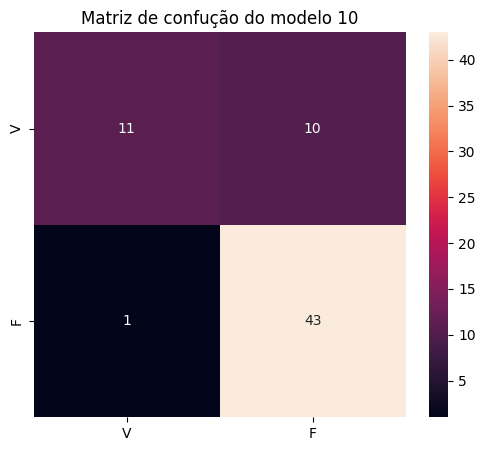

In [71]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred10), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 10');

In [72]:
!pip install pydotplus

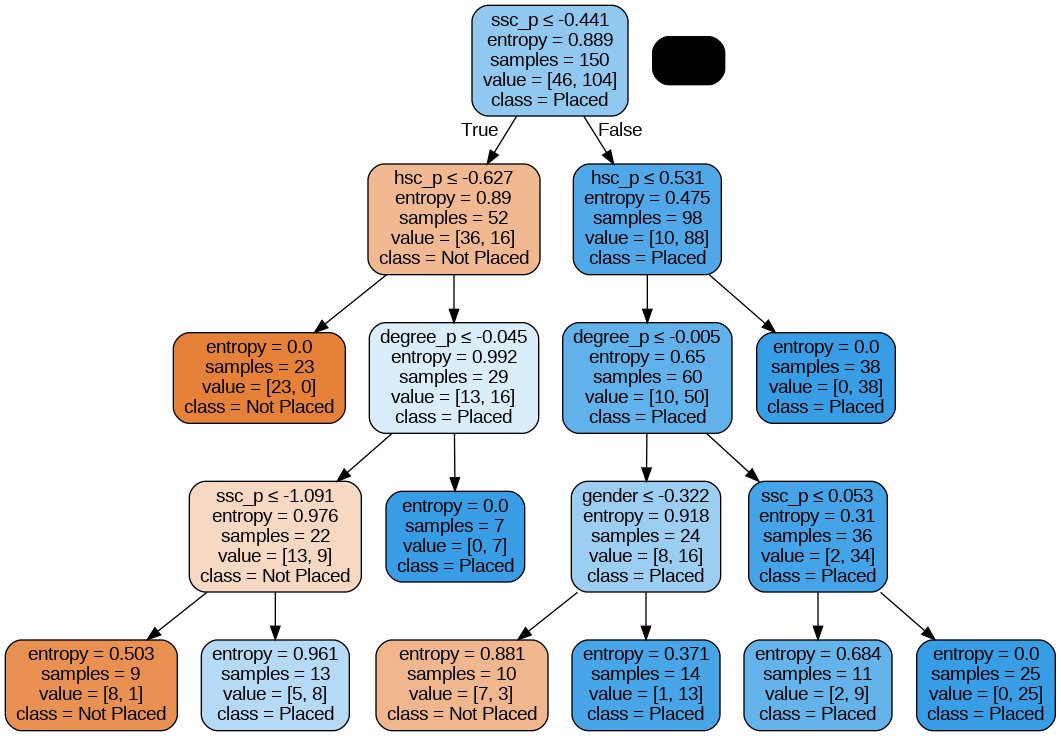

In [73]:
# Exportando a árvore
feature_names = X.columns.tolist()
classes_names = ['Not Placed', 'Placed']
dot_data = export_graphviz(model10, filled=True, feature_names=feature_names, class_names=classes_names, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())
graph.write_png("tree.png")
Image('tree.png')

##### 3.1.2.5 Modelo 5: Random Forest

In [74]:
param_grid = {'n_estimators':[10,100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)

grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................n_estimators=10;, score=0.767 total time=   0.0s
[CV 2/5] END ...................n_estimators=10;, score=0.767 total time=   0.0s
[CV 3/5] END ...................n_estimators=10;, score=0.867 total time=   0.0s
[CV 4/5] END ...................n_estimators=10;, score=0.833 total time=   0.0s
[CV 5/5] END ...................n_estimators=10;, score=0.933 total time=   0.0s
[CV 1/5] END ..................n_estimators=100;, score=0.833 total time=   0.2s
[CV 2/5] END ..................n_estimators=100;, score=0.800 total time=   0.2s
[CV 3/5] END ..................n_estimators=100;, score=0.967 total time=   0.3s
[CV 4/5] END ..................n_estimators=100;, score=0.833 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.867 total time=   0.2s
[CV 1/5] END ..................n_estimators=200;, score=0.867 total time=   0.3s
[CV 2/5] END ..................n_estimators=200;

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700,
                                          800, 1000]},
             verbose=3)

In [75]:
print(grid_cv.best_params_)

{'n_estimators': 200}


In [76]:
pred11 = grid_cv.predict(X_test)

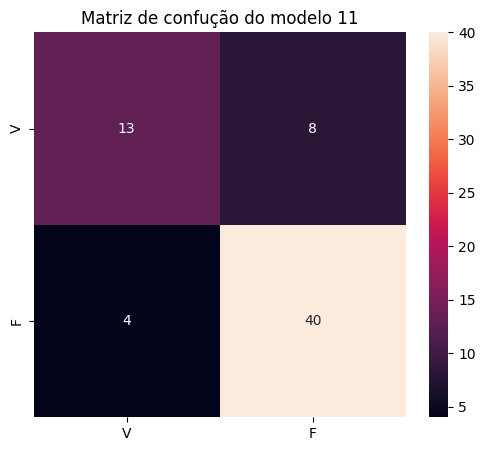

In [77]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred11), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 11');

##### 3.1.2.6 Modelo 6: XGboost

In [78]:
# Train the XGBoost model
model12 = XGBClassifier(max_depth=4, learning_rate= 0.05, n_estimators=200, objective = 'binary:logistic', randon_state=42)
model12.fit(X_train, y_train)

pred12 = model12.predict(X_test)
# Make predictions on the test data

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:42:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)


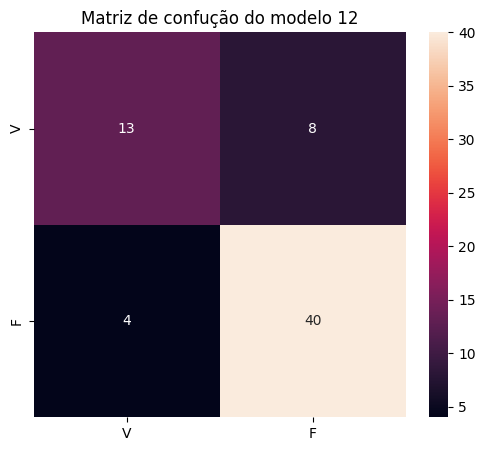

In [79]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,pred12), annot = True, yticklabels=['V', 'F'],xticklabels=['V', 'F'])
plt.title('Matriz de confução do modelo 12');

#4. Análise dos resultados


Abaixo está todos os relatórios de classificação dos modelos criados para melhor justificativa do modelo selecionado.

In [80]:
predictions = [pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9, pred10, pred11, pred12]
i=0
for pred in predictions:
  i+=1
  print(f'Classification Report do modelo {i}:')
  print(classification_report(y_test, pred))
  print('\n')

Classification Report do modelo 1:
              precision    recall  f1-score   support

           0       0.92      0.52      0.67        21
           1       0.81      0.98      0.89        44

    accuracy                           0.83        65
   macro avg       0.86      0.75      0.78        65
weighted avg       0.85      0.83      0.82        65



Classification Report do modelo 2:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.83      0.91      0.87        44

    accuracy                           0.82        65
   macro avg       0.80      0.76      0.78        65
weighted avg       0.81      0.82      0.81        65



Classification Report do modelo 3:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        21
           1       0.82      0.93      0.87        44

    accuracy                           0.82        65
   macro avg       

Ao analisar cada relatório, é possível notar que o modelo 4 possui a maior acurácia geral, com 0.87, o que o torna o mais preciso. No entanto, ao observar a precisão para previsões corretas quando o valor previsto deveria ser 0, os modelos 1, 5 e 9 se destacam. No entanto, nenhum dos modelos apresenta uma precisão superior para previsões corretas quando o valor previsto deveria ser 1.
Quanto ao "recall", apenas os modelos 1 e 2 demonstraram ser superiores quando o valor previsto deveria ser 1. No entanto, nenhum modelo foi capaz de prever melhor quando o valor previsto deveria ser 0 do que o modelo 4, proporcionalmente. Isso sugere uma tendência dos modelos em errar na previsão correta dessa variável.
Por fim, observa-se que o modelo 4 apresenta os melhores resultados para a métrica "f1-score". Apesar de o modelo performar melhor em prever corretamente quando a classe prevista é 1 e, em média harmônica, prever melhor do que os demais para a classe 0.

#5. Modelo escolhido

Devido a superioridade no que tange as métricas, o modelo que melhor entrega resultados é o modelo 4: Árvore de Decisão utilizando One-Hot Encoding.

##5.1 Respostas das perguntas iniciais

Com base nos acertos do modelo 4, a tabela abaixo indica as variáveis mais importantes para verificar se o estudante irão conseguir uma colocação no mercado de trabalho.

|Variável                | Explicação|
|------------------------|-----------------------------------|
|hsc_s                   | Especialization in higher secondary education|
|degree_t                | Degree type - undergraduation|
|specialization          |MBA|
|gender                  | Gênero|
|workex                  | Experiência de trabalho|
|ssc_p                   |Secondary Education percentage - 10th Grade|
|hsc_p                   |Higher Secondary Education percentage - 12th Grade|
|degree_p                |Degree Percentage|


##5.2 Dados para a criação da API

In [81]:
model_filename = 'modelo_finalizado_KMN.pkl'
pickle.dump(model4, open(model_filename, 'wb'))

In [82]:
model_filename = 'scaler.pkl'
pickle.dump(scaler, open(model_filename, 'wb'))